<a href="https://colab.research.google.com/github/Salsabilaurelia1408/tugasakhirsalsa/blob/main/Optimum_FIX_Relu6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from sklearn.model_selection import train_test_split


            Date    WOPR  WWPR   WGPR  GOR   WBHP
Time                                             
5     2015-07-06  1314.0   0.0  0.240  183  323.0
6     2015-07-07  1321.0   0.0  0.260  197  335.0
7     2015-07-08  1309.0   0.0  0.247  189  343.0
8     2015-07-09  1299.0   0.0  0.233  179  348.0
9     2015-07-10  1287.0   0.0  0.240  186  349.0
...          ...     ...   ...    ...  ...    ...
686   2017-05-17   501.2  13.1  0.315  628  239.0
687   2017-05-18   501.3  12.4  0.313  624  240.0
688   2017-05-19   500.2  12.5  0.314  628  239.0
689   2017-05-20   503.1  11.5  0.311  618  241.0
690   2017-05-21   503.1  11.5  0.311  618  241.0

[629 rows x 6 columns]


<Axes: xlabel='Time'>

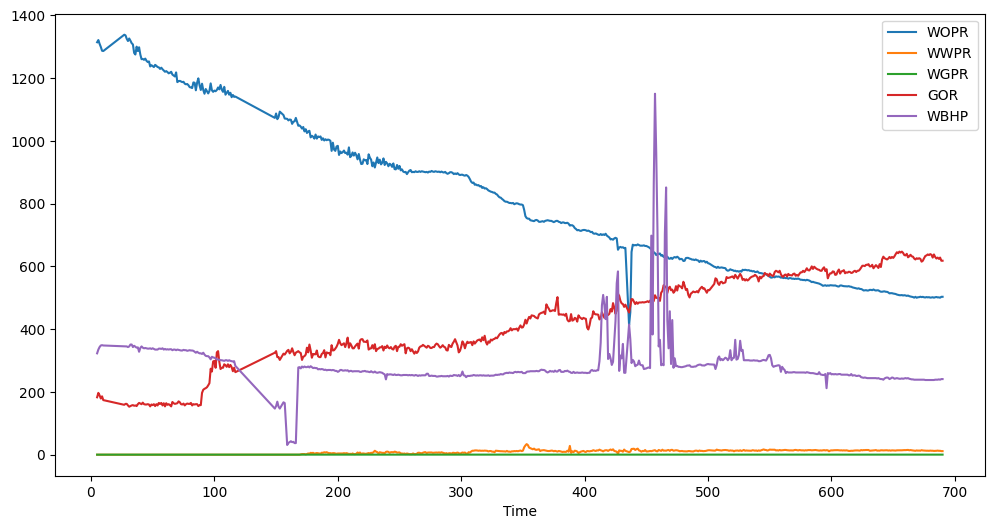

In [2]:
# Load data
url ='https://raw.githubusercontent.com/Salsabilaurelia1408/tugasakhirsalsa/main/WOPR2_DateFormatRevised.csv'

df = pd.read_csv(url, index_col='Time', parse_dates=True)
'''
df.set_index('Date', inplace=True)
df.index.freq ='MS'
'''

print(df)

df.plot(figsize=(12,6))

In [3]:
# Define input and output variables
X = df[['WOPR', 'WBHP', 'WWPR', 'WGPR', 'GOR']]
Y = df['WOPR']


# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(np.array(Y).reshape(-1,1))


In [4]:
# Reshape data to fit the input shape of the models
def reshape_data(data, look_back=1):
    X = []
    Y = []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, :])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

look_back = 5
X_reshaped, Y_reshaped = reshape_data(X_scaled, look_back)
# Split the data into train, development, and test sets (with shuffle=False)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_reshaped, Y_reshaped, test_size=0.3, shuffle=False)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_dev, Y_dev, test_size=0.5, shuffle=False)

# Define LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(64, activation='relu', input_shape=(look_back, 5)))
model_LSTM.add(Dense(1))
model_LSTM.add(Dropout(0.2))
model_LSTM.compile(optimizer='adam', loss='mse', metrics =['mae', 'accuracy'])

# Define GRU model
model_GRU = Sequential()
model_GRU.add(GRU(64, activation='relu', input_shape=(look_back, 5)))
model_GRU.add(Dense(1))
model_LSTM.add(Dropout(0.2))
model_GRU.compile(optimizer='adam', loss='mse', metrics =['mae', 'accuracy'])

# Define Vanilla RNN model
model_Vanilla = Sequential()
model_Vanilla.add(SimpleRNN(64, activation='relu', input_shape=(look_back, 5)))
model_Vanilla.add(Dense(1))
model_LSTM.add(Dropout(0.2))
model_Vanilla.compile(optimizer='adam', loss='mse', metrics =['mae', 'accuracy'])

# Train the models
history_LSTM = model_LSTM.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_dev, Y_dev), verbose=1, shuffle = False)
history_GRU = model_GRU.fit(X_train, Y_train, epochs=50, batch_size =64, validation_data=(X_dev, Y_dev), verbose=1, shuffle = False)
history_Vanilla = model_Vanilla.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_dev, Y_dev), verbose=1, shuffle = False)

# Predict using the models
Y_pred_LSTM = model_LSTM.predict(X_test)
Y_pred_GRU = model_GRU.predict(X_test)
Y_pred_Vanilla = model_Vanilla.predict(X_test)

# Reshape predicted and actual values
Y_pred_LSTM = scaler.inverse_transform(Y_pred_LSTM.reshape(-1, 1))
Y_pred_GRU = scaler.inverse_transform(Y_pred_GRU.reshape(-1, 1))
Y_pred_Vanilla = scaler.inverse_transform(Y_pred_Vanilla.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))



Epoch 1/50
7/7 [==============================] - 6s 263ms/step - loss: 0.2625 - mae: 0.4387 - accuracy: 0.0023 - val_loss: 9.0123e-04 - val_mae: 0.0261 - val_accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 35ms/step - loss: 0.2059 - mae: 0.3801 - accuracy: 0.0023 - val_loss: 0.0070 - val_mae: 0.0819 - val_accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 32ms/step - loss: 0.1988 - mae: 0.3666 - accuracy: 0.0023 - val_loss: 0.0074 - val_mae: 0.0842 - val_accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 0s 22ms/step - loss: 0.1816 - mae: 0.3432 - accuracy: 0.0023 - val_loss: 0.0030 - val_mae: 0.0522 - val_accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 0s 25ms/step - loss: 0.1772 - mae: 0.3272 - accuracy: 0.0046 - val_loss: 3.1624e-04 - val_mae: 0.0145 - val_accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 0s 27ms/step - loss: 0.1541 - mae: 0.2766 - accuracy: 0.0046 - val

LSTM Model Loss: [268611.5, 518.0923461914062, 0.0]
GRU Model Loss: [268543.1875, 518.026611328125, 0.0]
Vanilla RNN Model Loss: [268477.5625, 517.9628295898438, 0.0]
LSTM Model Loss_val: [0.006729811895638704, 0.08123745769262314, 0.0]
GRU Model Loss_val: [7.760323933325708e-05, 0.007428549695760012, 0.0]
Vanilla RNN Model Loss_val: [0.0011693135602399707, 0.03006880357861519, 0.0]


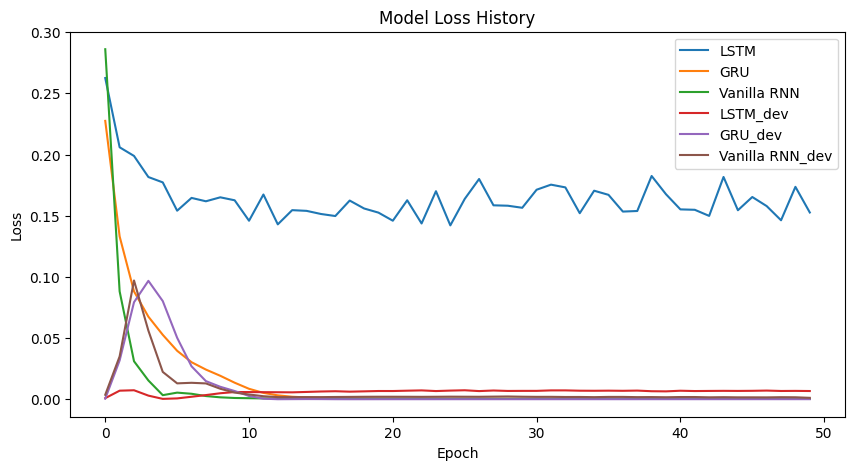

In [5]:
# Evaluate the models
loss_LSTM = model_LSTM.evaluate(X_test, Y_test, verbose=0)
loss_GRU = model_GRU.evaluate(X_test, Y_test, verbose=0)
loss_Vanilla = model_Vanilla.evaluate(X_test, Y_test, verbose=0)
loss_LSTM_val = model_LSTM.evaluate(X_dev, Y_dev, verbose=0)
loss_GRU_val = model_GRU.evaluate(X_dev, Y_dev, verbose=0)
loss_Vanilla_val = model_Vanilla.evaluate(X_dev, Y_dev, verbose=0)

print('LSTM Model Loss:', loss_LSTM)
print('GRU Model Loss:', loss_GRU)
print('Vanilla RNN Model Loss:', loss_Vanilla)
print('LSTM Model Loss_val:', loss_LSTM_val)
print('GRU Model Loss_val:', loss_GRU_val)
print('Vanilla RNN Model Loss_val:', loss_Vanilla_val)

# Plot the loss history of each model
plt.figure(figsize=(10,5))
plt.plot(history_LSTM.history['loss'], label='LSTM')
plt.plot(history_GRU.history['loss'], label='GRU')
plt.plot(history_Vanilla.history['loss'], label='Vanilla RNN')
plt.plot(history_LSTM.history['val_loss'], label='LSTM_dev')
plt.plot(history_GRU.history['val_loss'], label='GRU_dev')
plt.plot(history_Vanilla.history['val_loss'], label='Vanilla RNN_dev')
plt.title('Model Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

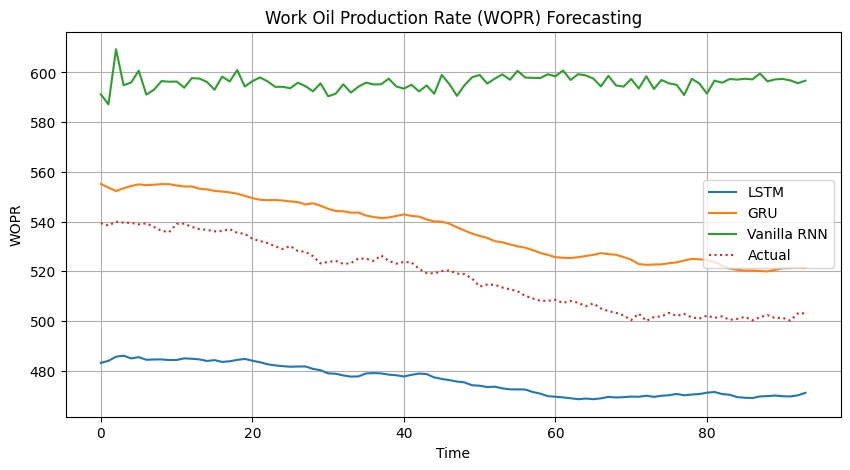

In [6]:

# Plot the predicted and actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(Y_pred_LSTM, label='LSTM')
plt.plot(Y_pred_GRU, label='GRU')
plt.plot(Y_pred_Vanilla, label='Vanilla RNN')
plt.plot(Y_test, label='Actual', ls= "dotted")
plt.title('Work Oil Production Rate (WOPR) Forecasting')
plt.xlabel('Time')
plt.ylabel('WOPR')
plt.grid(True)
plt.legend()
plt.show()